# Setup and Imports

In [1]:
!pip install faker
!pip install scipy

In [2]:
import csv
import random

from faker import Faker
from scipy.stats import truncnorm
from decimal import Decimal

faker = Faker()

# Pseudorandom Value Generation Functions

In [4]:
##
# Skewed Normal Distribution Helper Function
##
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
##
# Random Savings Number Distribution
# Mean $5,0000, SD $20,000, Lower $0, Upper $80,000
# Source: https://www.fool.com/the-ascent/research/average-savings-account-balance/#:~:text=71%25%20of%20Americans%20have%20a,while%20the%20mean%20is%20%2426%2C619.
##
def random_savings(upp=80000):
    return round(get_truncated_normal(mean=4000, sd=20000, low=0, upp=upp).rvs(), 2)

##
# Random Investments Number Distribution
# Mean $25,000, SD $30,000, Lower $0, Upper $200,000
# Retirement Account Source: https://www.businessinsider.com/personal-finance/investments-by-age-americans-non-retirement-2020-3
##
def random_investments(upp=200000):
    return round(get_truncated_normal(mean=25000, sd=30000, low=0, upp=upp).rvs(), 2)

##
# Random Salary Number Distribution
# Mean $45,000, SD $30,000, Lower $0, Upper $210,000
# Source: https://www.statista.com/statistics/203183/percentage-distribution-of-household-income-in-the-us/
##
def random_salary(upp=210000, low=10000):
    return round(get_truncated_normal(mean=45000, sd=30000, low=low, upp=upp).rvs(), 2)

##
# Random Age Number Distribution
# Mean 30, SD 20, Lower 18, Upper 90
##
def random_age(mean=30, sd=20, low=18, upp=90):
    return int(get_truncated_normal(mean=mean, sd=sd, low=low, upp=upp).rvs())

##
# Random Event Generator (Used for unlikely events)
# Returns True 5% of the Time
##
def random_event():
    return random.randint(0,19) == 1

##
# Random Ethnicity Generator
# Selects a random choice from a list of ethnicities
##
def random_ethnicity():
    return random.choice(['White', 'Hispanic or Latino', 
                          'Black or African American', 'Native American or American Indian',
                          'Asian / Pacific Islander', 'Other'])

##
# Random Gender Generator
# Selects a random gender with 50% odds
##
def random_gender():
    return 'MALE' if random.randint(0,1) == 0 else 'FEMALE'

##
# Random Criminal History Generator
# Gives someone a criminal history 1% of the time
##
def random_criminal_history():
    return random.randint(1,100) <= 0

##
# Random Education Generator
# Selects a random choice from a list of educational backgrounds
##
def random_education():
    return random.choice(['None','Some High School','High School',
                          'Some College', 'Bachelors Degree', 'Graduate Degree'])

##
# Random Religion Generator
# Selects a random choice from a list of religious backgrounds
##
def random_religion():
    return random.choice(['Christian', 'Muslim', 'Atheist', 'Hindu', 
                          'Buddhist', 'Chinese Traditional', 'Other'])

##
# Random Language Generator
# Selects a random choice from a list of languages
##
def random_language():
    return random.choice(['English', 'Mandarin', 'Hindi', 
                          'Spanish', 'French', 'Arabic', 
                          'Bengali', 'Russian', 'Other'])

##
# Random Children Count Distribution
# Mean 2, SD 2, Lower 0, Upper 7
##
def random_children_count():
    return int(get_truncated_normal(mean=2, sd=2, low=0, upp=7).rvs())

##
# Random Previous Marriage Count Normal Distribution
# Mean 0, SD 1, Lower 0, Upper 5
##
def random_previous_marriage_count(mean=0, sd=1.5, low=0, upp=5):
    return int(get_truncated_normal(mean=mean, sd=sd, low=low, upp=upp).rvs())

##
# Random Marriage Years Normal Distribution
# Mean 8, SD 10, Lower 1, Upper 40
# Based on average marriage of 8.2 years
##
def random_marriage_years():
    return int(get_truncated_normal(mean=8, sd=10, low=1, upp=40).rvs())

##
# Random Dating Months Normal Distribution
# Mean 18, SD 6, Lower 0, Upper 40
# Based on average months to engaged of 12-18 months
##
def random_dating_months():
    return int(get_truncated_normal(mean=18, sd=6, low=0, upp=40).rvs())

##
# Random Joint Bank Account Recent Generator
# 10% Chance that they recently opened a joint bank account together
##
def random_recent_join_bank_account():
    return random.randint(1,10) == 1

##
# Randomly Nervous at Interview Generator
# 20% chance that they are nervous at the interview
##
def random_nervousness_at_interview():
    return random.randint(1,5) == 1

# Generate a non-fraud Record

In [5]:
def get_standard_record(fraudulent):
    num_previous_marriages = 0
    age = random_age()
    spouse_age = random_age(mean=age, sd=1, low=18, upp=90)
    ethnicity = random_ethnicity()
    religion = random_religion()
    language = random_language()
    address = faker.address()
    
    return {
        'Balance of Savings and Checkings account (I-864)': random_savings(),
        'Current cash value of stocks, bonds, etc. (I-864)': random_investments(),
        'Annual Income (I-864)': random_salary(), 
        'Country of Birth (I-130)': faker.country(), 
        'First Petition for Beneficiary (I-130)': random_event(),
        'Beneficiary Ever in Immigration Proceedings (I-130)': random_event(), 
        'Criminal History (N-400)': random_criminal_history(),
        'Age': age, 
        'Spouse - Age (I-130)': spouse_age, 
        'Gender': random_gender(),
        'Job': faker.job(), 
        'Education': random_education(), 
        'Race/Ethnicity (I-130)': ethnicity,
        'Spouse - Race/Ethnicity (I-130)': ethnicity,
        'Religion (I-130)': religion,
        'Spouse - Religion (I-130)': religion,
        'Language (I-130)': language,
        'Spouse - Language (I-130)': language,
        'Children Count (I-130)': random_children_count(), 
        'Address (I-130)': address,
        'Spouse - Address (I-130)': address,
        'Number of Previous Marriages (I-130)': num_previous_marriages, 
        'Length of Marriage 1 - Years (I-130)': random_marriage_years() if num_previous_marriages >= 1 else 0, 
        'Length of Marriage 2 - Years (I-130)': random_marriage_years() if num_previous_marriages >= 2 else 0, 
        'Length of Marriage 3 - Years (I-130)': random_marriage_years() if num_previous_marriages >= 3 else 0, 
        'Length of Marriage 4 - Years (I-130)': random_marriage_years() if num_previous_marriages >= 4 else 0, 
        'Length of Marriage 5 - Years (I-130)': random_marriage_years() if num_previous_marriages >= 5 else 0, 
        'Dating Length (I-130 Interview)': random_dating_months(), 
        'Recent Joint Bank Accounts (I-130 Interview)': random_recent_join_bank_account(),
        'Nervousness at I-130 Interview (I-130 Interview)': random_nervousness_at_interview(),
        'Known Fradulent': fraudulent,
        'Reasons': 'None Known' # For Debugging
    }

# Define Conditions from the QVM

In [6]:
##
# 1 to 3 indicators that show Poor Financial Status
##
def poor_financial_status(record):
    indicator_count = random.randint(1,3)
    if indicator_count >= 1:
        record['Balance of Savings and Checkings account (I-864)'] = random_savings(upp=5000)
    if indicator_count >= 2:
        record['Current cash value of stocks, bonds, etc. (I-864)'] = random_investments(upp=1000)
    if indicator_count >= 3:
        record['Annual Income (I-864)'] = random_salary(upp=15000, low=0)
    
    return record

##
# Singular condition for being from a high fraud country
##
# Source: https://mypathtocitizenship.com/which-countries-are-on-the-uscis-high-fraud-list/
def high_fraud_countries(record):
    high_fraud_countries = ['Nigeria', 'India', 'Ghana', 'Morocco', 
                            'Yemen', 'Kenya', 'Pakistan', 'China', 'Philippines', 'Mexico']
    record['Country of Birth (I-130)'] = random.choice(high_fraud_countries)
    return record

##
# Has multiple open petitions
##
def multiple_open_petitions(record):
    record['First Petition for Beneficiary (I-130)'] = True
    return record

##
# Has multiple immigration proceedings
##
def multiple_immigration_proceedings(record):
    record['Beneficiary Ever in Immigration Proceedings (I-130)'] = True
    return record

##
# Has a criminal history
##
def criminal_history(record):
    record['Criminal History (N-400)'] = True
    return record

##
# Has an inconsistent age, job, and education combination
##
# TODO refine further. Filler for now.
def inconsistent_occupation(record):
    record['Age'] = random_age(upp=21)
    record['Job'] = random.choice(['Doctor', 'Lawyer'])
    record['Education'] = random.choice(['None','Some High School','High School', 'Some College'])
    return record
    
##
# 1 to 3 indicators that show spouses share cultural differences
##
def cultural_differences(record):
    indicator_count = random.randint(1,3)
    if indicator_count >= 1:
        ethnicities = random.sample(['White', 'Hispanic or Latino', 
                          'Black or African American', 'Native American or American Indian',
                          'Asian / Pacific Islander', 'Other'], 2)
        record['Race/Ethnicity (I-130)'] = ethnicities[0]
        record['Spouse - Race/Ethnicity (I-130)'] = ethnicities[1]
    if indicator_count >= 2:
        religions = random.sample(['Christian', 'Muslim', 'Atheist', 'Hindu', 
                          'Buddhist', 'Chinese Traditional', 'Other'], 2)
        record['Religion (I-130)'] = religions[0]
        record['Spouse - Religion (I-130)'] = religions[1]
    if indicator_count >= 3:
        languages = random.sample(['English', 'Mandarin', 'Hindi', 
                          'Spanish', 'French', 'Arabic', 
                          'Bengali', 'Russian', 'Other'], 2)
        record['Language (I-130)'] = languages[0]
        record['Spouse - Language (I-130)'] = languages[1]
    
    return record
##
# 1 to 5 indicators for poor marital factors
##
def marital_factors(record):
    indicator_count = random.randint(1,5)
    if indicator_count >= 1:
        record['Children Count (I-130)'] = 5
    if indicator_count >= 2:
        record['Spouse - Age (I-130)'] = record['Age'] + random.randint(20,50)
    if indicator_count >= 3:
        record['Address (I-130)'] = faker.address()
        record['Spouse - Address (I-130)'] = faker.address()
    if indicator_count >= 4:
        num_previous_marriages = random.randint(2,5)
        record['Number of Previous Marriages (I-130)'] = num_previous_marriages
        record['Length of Marriage 1 - Years (I-130)'] = random_marriage_years() if num_previous_marriages >= 1 else 0 
        record['Length of Marriage 2 - Years (I-130)'] = random_marriage_years() if num_previous_marriages >= 2 else 0
        record['Length of Marriage 3 - Years (I-130)'] = random_marriage_years() if num_previous_marriages >= 3 else 0
        record['Length of Marriage 4 - Years (I-130)'] = random_marriage_years() if num_previous_marriages >= 4 else 0
        record['Length of Marriage 5 - Years (I-130)'] = random_marriage_years() if num_previous_marriages >= 5 else 0
    if indicator_count >= 5:
        record['Dating Length (I-130 Interview)'] = random.randint(0,3)
        
    return record

##
# 1 to 2 indicators for miscellaneous factors
##
def misc_factors(record):
    indicator_count = random.randint(1,2)
    if indicator_count >= 1:
        record['Recent Joint Bank Accounts (I-130 Interview)'] = True
    if indicator_count >= 2:
        record['Nervousness at I-130 Interview (I-130 Interview)'] = True
        
    return record
        
##
# All fraudulent marker functions from the QVM in a list
##
fraudulent_markers = [poor_financial_status, high_fraud_countries, multiple_open_petitions, 
                      multiple_immigration_proceedings, criminal_history, inconsistent_occupation, 
                      cultural_differences, marital_factors, misc_factors]

# Generate a fraudulent record
## Randomly selects a number of fraudulent markers
## Also randomly selects a sample of which functions to apply to the record

In [7]:
def get_fraudulent_record(record):
    n = int(get_truncated_normal(mean=2, sd=3, low=1, upp=len(fraudulent_markers)).rvs())
    
    fraudulent_functions = random.sample(fraudulent_markers, n)
    fradulence_reasons = []
    for func in fraudulent_functions:
        record = func(record)
        fradulence_reasons.append(func.__name__)
        
    record['Reasons'] = ', '.join(fradulence_reasons)
    return record

record = get_standard_record(True)
record = get_fraudulent_record(record)

# Generate the CSV
## Define Record Count and Rough % that should be Fraud

In [8]:
import time
start = time.time()

RECORD_COUNT = 1100000
ROUGH_PERCENT_FRAUD = 6


def create_csv_file():
    number_fraud = 0
    with open('synthetic-data-dev.csv', 'w', newline='') as csvfile:
        fieldnames = get_standard_record(False)
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        
        for i in range(RECORD_COUNT):
            if (i+1) % 10000 == 0:
                print('%s records generated.' % str(i+1))
                
            row_json = {}
            
            fraudulent = random.randint(1,100) <= ROUGH_PERCENT_FRAUD
            record = get_standard_record(fraudulent)
            
            if fraudulent:
                number_fraud += 1
                record = get_fraudulent_record(record)
            
            for field in record.keys():
                row_json[field] = str(record[field]).replace("\n", "")
                
            writer.writerow(row_json)
    
    print('%s are Fraudulent' % str(number_fraud))
            
create_csv_file()

end = time.time()
print("The time of execution for", RECORD_COUNT , "records is :", end-start)

10000 records generated.
20000 records generated.
30000 records generated.
40000 records generated.
50000 records generated.
60000 records generated.
70000 records generated.
80000 records generated.
90000 records generated.
100000 records generated.
110000 records generated.
120000 records generated.
130000 records generated.
140000 records generated.
150000 records generated.
160000 records generated.
170000 records generated.
180000 records generated.
190000 records generated.
200000 records generated.
210000 records generated.
220000 records generated.
230000 records generated.
240000 records generated.
250000 records generated.
260000 records generated.
270000 records generated.
280000 records generated.
290000 records generated.
300000 records generated.
310000 records generated.
320000 records generated.
330000 records generated.
340000 records generated.
350000 records generated.
360000 records generated.
370000 records generated.
380000 records generated.
390000 records genera

# View Distributions of Data

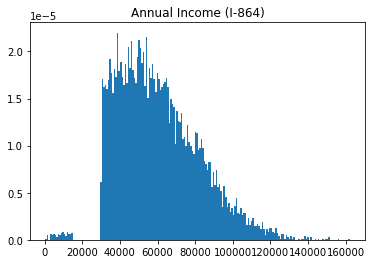

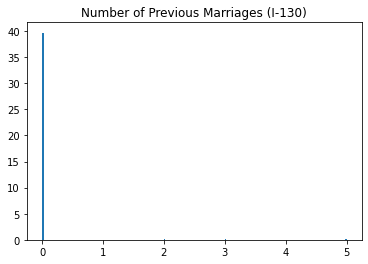

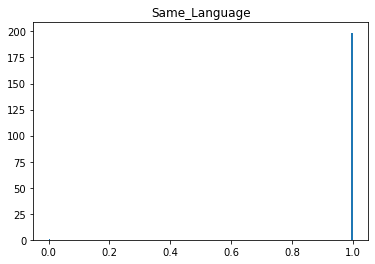

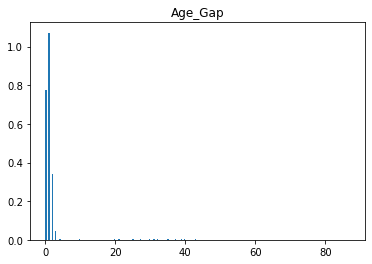

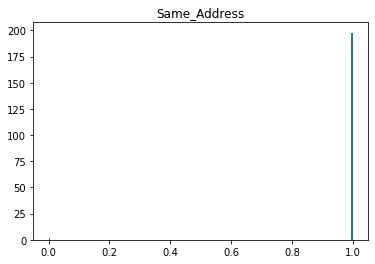

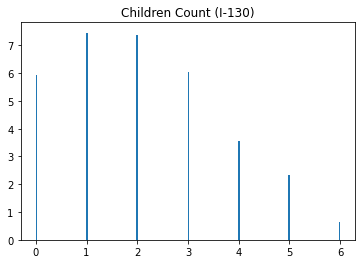

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../Data/Synthetic/synthetic-data-dev.csv')

df['Age_Gap'] = abs(df['Age'] - df['Spouse - Age (I-130)'])
df['Same_Language'] = (df['Language (I-130)'] == df['Spouse - Language (I-130)']).astype(int)
df['Same_Address'] = (df['Address (I-130)'] == df['Spouse - Address (I-130)']).astype(int)

interested_fields = [
        'Annual Income (I-864)',
        'Number of Previous Marriages (I-130)',
        'Same_Language',
        'Age_Gap',
        'Same_Address',
        'Children Count (I-130)'
]

for field in interested_fields:
    plt.hist(df[field], bins=200, density=True)
    plt.title(field)
    plt.show()